##**Project Name**: **Supervised Regression-📉Yes Bank Stock Closing Price Prediction📈**

##### **Project Type**    - ML Model Building Using Supervised Regression
##### **Contribution**    - Individual

# **Project Summary -**

The "Regression-Yes Bank Stock Closing Price Prediction" capstone project aims to develop an accurate and reliable model for forecasting the closing prices of Yes Bank stocks. Yes Bank, a prominent financial institution, is subject to various market dynamics and economic factors that influence its stock prices. The project utilizes regression analysis, a powerful statistical method, to create a predictive model that can assist investors, traders, and financial analysts in making informed decisions.

# **Problem Statement**

In the complex landscape of financial markets, predicting stock prices accurately is a challenging task. Investors, traders, and financial analysts face difficulties in making well-informed decisions due to the lots of factors influencing stock prices. The specific challenge addressed in this capstone project is the need for a reliable regression-based model to predict the closing prices of Yes Bank stocks. The goal is to develop a robust predictive model that leverages historical stock data, financial indicators, and relevant macroeconomic variables to forecast Yes Bank's stock closing prices.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [67]:
# Import Required Libraries
import numpy as np # Used for Fast mathematical operations over arrays,Linear Algebra, Fourier Transforms, Random Number Generation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load The Dataset
data = pd.read_csv('/content/drive/MyDrive/dataset_link/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Dataset Information

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

As we can see, there are 185 rows and 5 columns i.e. ['Date', 'Open', 'High', 'Low', 'Close']. There are zero duplicates values and non-null values. Also there is no missing values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

There are five variables in this dataset. i.e. 'Date', 'Open', 'High', 'Low', 'Close'. Out of these..

**Independent Variable** are: Date, Open, High and Low

**Dependent Variable**: Close.

**'Date':** Represents the date of the stock market data.

**'Open':** Denotes the opening price of the stock on a particular date.

**'High':** Indicates the highest price reached by the stock during the trading day.

**'Low':** Represents the lowest price reached by the stock during the trading day.

**'Close':** Denotes the closing price of the stock on a particular date.

In describe dataset, the maximum stock price open by 369.95 points and closed by 367.90 points and minimum stock price open by 105.54 and close by approx. same points.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## **3**. ***Data Wrangling***

In [12]:
# Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.
# Date Transformation: Convert a data type of column Date to datetime object format.

data["Date"] = pd.to_datetime(data["Date"],format='%b-%y')

In [13]:
# Check wether it is converted or not
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**1: Univariate Analysis**

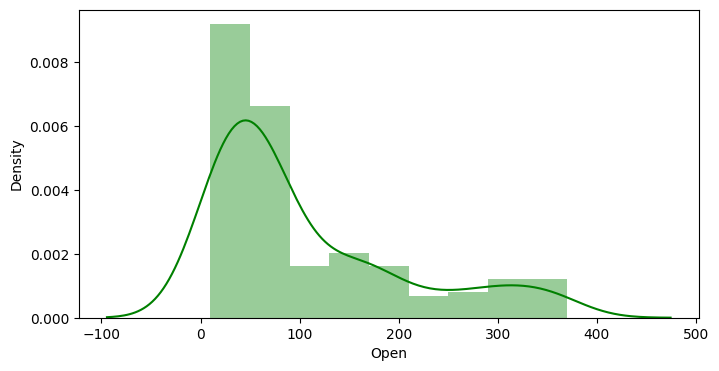

In [14]:

# Check the distribution of Open columns
plt.figure(figsize=(8,4))
sns.distplot(data['Open'],color='green',kde=True)
plt.show()

In [15]:
# Lets check skewness
data.Open.skew()

1.2657173528789976

1. Why did you pick the specific chart?
The distplot can provide a clear visual representation of the central tendency (mean, median, mode) ,the spread (standard deviation) and the skewness of the data. Also we plot the univariate variable is 'Open' stock price, so we can clearly visualize the its distribution.


2. What is/are the insight(s) found from the chart?
The Yes Bank stock opening price prediction ML model, a distribution plot of the opening price can provide several insights, including-The shape of the distribution is positively (right) skewed which is the value is 1.265 i.e. the value is greater than zero. A skewed distribution suggests that the closing price is more concentrated on one side of the mean.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There no negative growth in opening price stock in Yes Bank.

#### Chart - 2

**2: Bivariate Analysis**

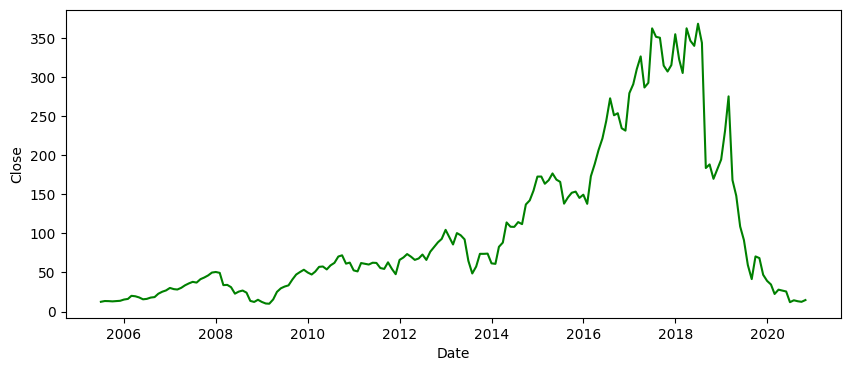

In [16]:
# Chart-2: Bivariate Analysis
# Relationship between opening and closing price stock

plt.figure(figsize=(10,4))
sns.lineplot(x='Date',y='Close',data=data, color = 'green')
plt.show()

1. Why did you pick the specific chart?
Line charts are commonly used to visualize trends and changes over time, making them suitable for representing opening and closing stock prices. Line charts inherently display a temporal relationship along the x-axis, making them ideal for representing time-series data. Also,it emphasize the continuity and connectivity of data points. Line charts are simple and easy to understand, promoting clarity in conveying the overall trends in stock prices.


2. What is/are the insight(s) found from the chart?
As we can see, the closing stock price is increasing from the year 2016 and it continues till 2018.(The closing price approx. 350+) After that, it suddenly descreases in the year end of 2018. In 2019, again suddenly it increased. In 2020, it went low closing stock price.(Stock price was ~25)


3. What all manipulations have you done and insights you found?

**Inference:**The graph demonstrates how closing price stock varies with each passing year.We can clearly see from the graph that around 2018, when the fraud case involving Rana kapoor came to light, a clear significant dip can be seen in the stock price of Yes Bank data

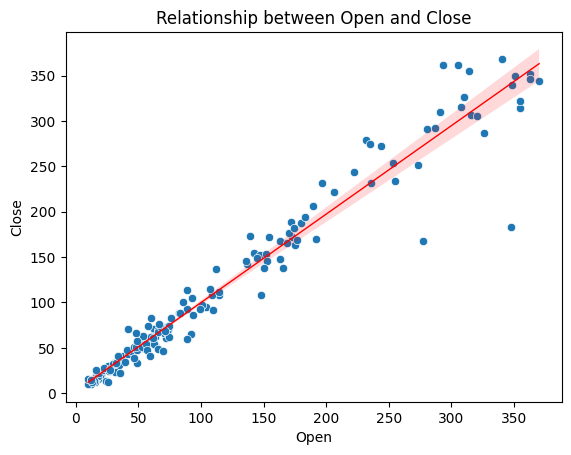

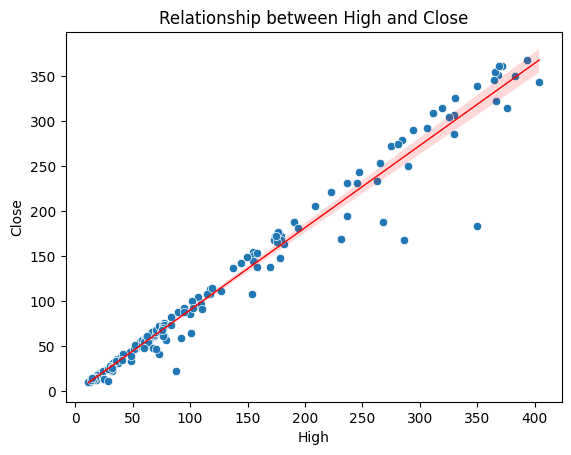

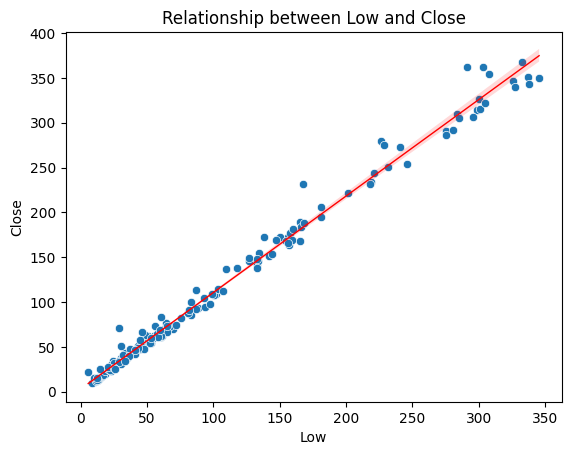

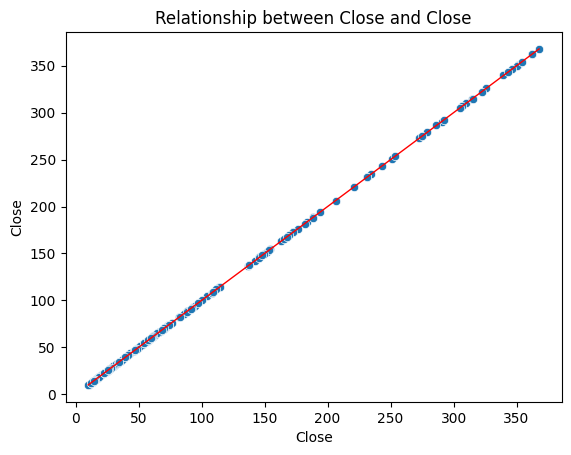

In [17]:
for i in data.columns[1:]:
    plt.title(f'Relationship between {i} and Close')
    sns.scatterplot(x=i, y='Close', data=data)
    sns.regplot(x=i, y='Close', data=data, scatter=False, color='r', line_kws={'linewidth': 1})
    plt.show()
    # To check relationship between others columns as well


**Inferences:** As we can see that there is linear relation and high correlation between each independent variables and our dependent variable.Also we can see that the value of correlation between dependent variable Close and feature High is 0.985.As we can see that there is a linear relation and very high correlation between our dependent variable and independent variables. The value of correlation between Close and Open is 0.978 and b/w Close and Low is 0.9954.

#### Chart - 3

**3: Multivariate Analysis**

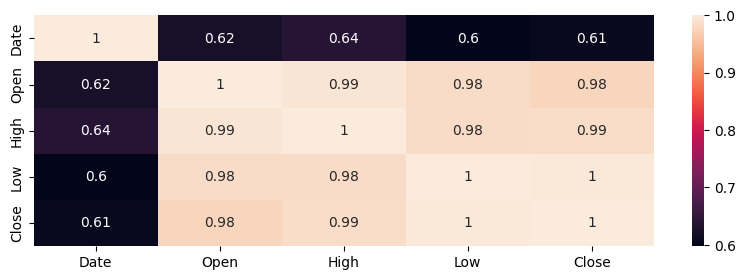

In [18]:
# Chart - 3 visualization code for Multivariate Analysis
plt.figure(figsize=(10,3))
cor = sns.heatmap(data.corr(),annot=True)

1. Why did you pick the specific chart?
A heatmap provides an easy and intuitive way to visualize patterns in a correlation matrix. It allows you to quickly identify strong positive or negative correlations between variables. The color gradient used in a heatmap makes it easy to distinguish between different levels of correlation. Heatmaps allow for the easy comparison of correlations between all pairs of variables.

2. What is/are the insight(s) found from the chart?
In the heatmap graph, there is no multi-co-relation between the variables, because the variables values are alomost ~1.

#### **Chart - 4: Pairplot**

<Figure size 600x400 with 0 Axes>

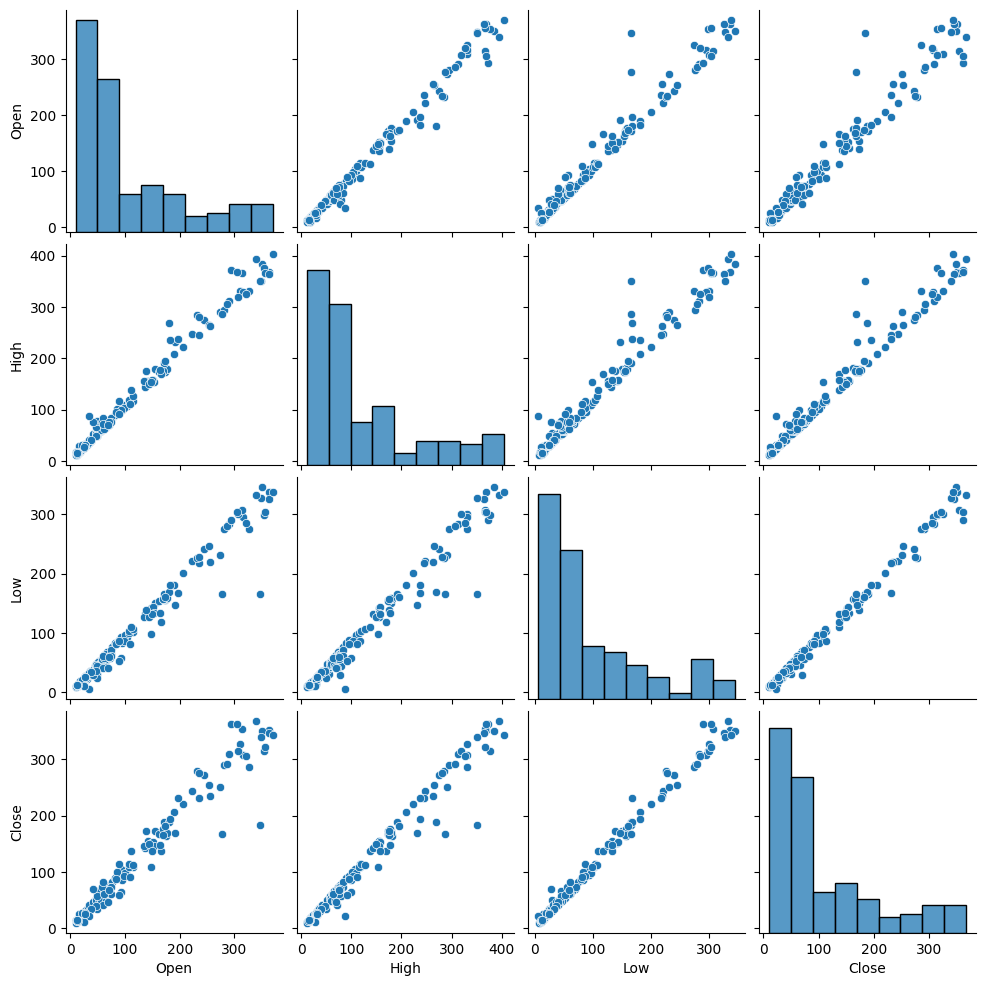

In [19]:
# Chart - 4 visualization code
# Coreleate relationship between the variables
plt.figure(figsize=(6,4))
cor = sns.pairplot(data)

1. Why did you pick the specific chart?
A pairplot is a type of visualization in seaborn that is particularly useful for exploring relationships between multiple variables in a dataset. It is essentially a grid of scatterplots, histograms, and kernel density plots, allowing you to quickly assess the pairwise relationships and distributions of numerical variables.

2. What is/are the insight(s) found from the chart?
From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [20]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

What all missing value imputation techniques have you used and why did you use those techniques?
There is no missing values present in the dataset. If there is missing values then we can imputation method, menan/avg value of the specified coloumn value, also we can use median.

### 2. Handling Outliers

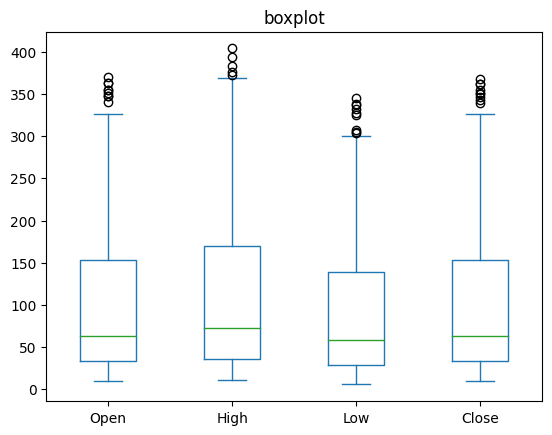

In [21]:
# Handling Outliers & Outlier treatments
col = list(data.columns)
ax = data[col].plot(kind='box', title='boxplot')
plt.show()

What all outlier treatment techniques have you used and why did you use those techniques?
As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

We can clearly see that these distributions are positively skewed in above graph. The mean and median are at significant distance from each other.

So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

<Axes: xlabel='Close', ylabel='Density'>

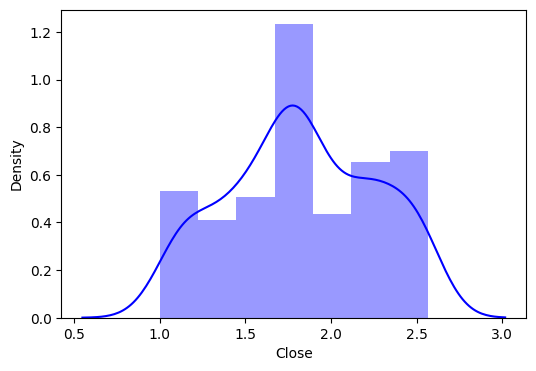

In [22]:
# Let's use log transformation on these features using np.log() and plot them.

plt.figure(figsize=(6,4))
sns.distplot(np.log10(data["Close"]),color='b')

Note: Plotting the dependent variable. We can see that our dependent variable close is positively skewed (as seen on the left).So we do a log transform on it and plot it as seen in the right chart. This makes it approximate normal distribution and is optimal for our model's performance. Now our mean and median are nearly equal.

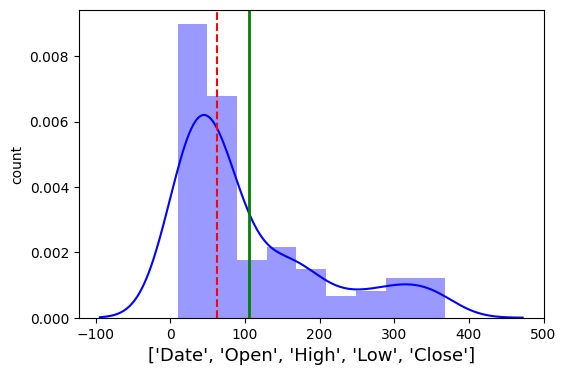

In [23]:
# Plotting the distributions of all features.

plt.figure(figsize=(6,4))
sns.distplot(data['Close'], color='b')
plt.xlabel(col, fontsize=13)
plt.ylabel('count')

# Plotting the mean and the median.
plt.axvline(data['Close'].mean(),color='green',linewidth=2)                            # 'axvline' plots a vertical line at a value (mean in this case).
plt.axvline(data['Close'].median(),color='red',linestyle='dashed',linewidth=1.5)
plt.show()

Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.Distribution of dependent variable High before and after applying log transform.

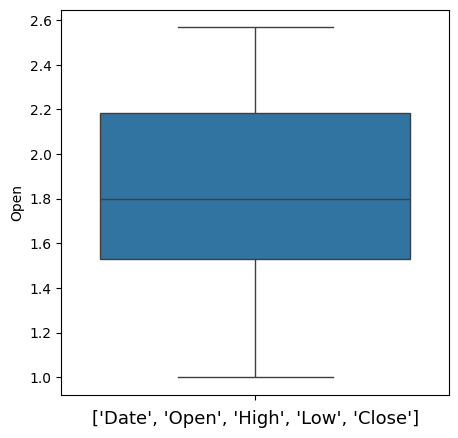

In [24]:
# Let's check for outliers now in the transformed variable data.
plt.figure(figsize=(5,5))
sns.boxplot(np.log10(data['Open']))
plt.xlabel(col, fontsize=13)
plt.show()

### 3. Categorical Encoding

In [25]:
# Encode your categorical columns
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


What all categorical encoding techniques have you used & why did you use those techniques?

We can see from the dataframe above, all the columns we have contain numerical data. There is no categorical data present.

### 4. Data Scaling

In [26]:
# Scaling your data

data_pr=data.copy() # Making of our original data
# Separate out Dependent and Independent variable
X=np.log10(data_pr.iloc[:,1:-1]) # Normalizing the data using log transformation
y=np.log10(data_pr['Close']) # Normalizing the data using log transformation

Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.

Which method have you used to scale you data and why?

Ans: We use log transformation to scale data because this method applies a logarithmic transformation to the data, which can help normalize skewed data and reduce the impact of outliers.

### 5. Data Splitting

Split data for training and testing.

In [27]:
# Splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # Random_state is used to shuffle data

sklearn is a library which includes all the packages related to ML such as regssion, classification, clustering, data preprocessing

In [28]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Checking the values.
X_train[0:10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

In [30]:
# Split your data to train and test. Choose Splitting ratio wisely
print("Training data",X_train.shape)
print("Testing data",X_test.shape)
print("Training data",y_train.shape)
print("Testing data",y_test.shape)

Training data (148, 3)
Testing data (37, 3)
Training data (148,)
Testing data (37,)


What data splitting ratio have you used and why?

Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

## ***6. ML Model Implementation***

###**ML Model -1: Build a Linear Regression Model**

In [31]:
# Initialize the model
linear_model=LinearRegression()
# Train the model
linear_model.fit(X_train,y_train)

LinearRegression()

In [32]:
# Test the model / make prediction: # Predicting on our test data.
y_pred_linear= linear_model.predict(X_test)

In [33]:
# Checking the model parameters. printing the intercept.
linear_model.intercept_

1.799864714136271

In [34]:
# Printing the model coefficients.
linear_model.coef_

array([-0.22992597,  0.33533242,  0.31585415])

###Metric evaluation chart:

In [35]:
#Checking the performance using evaluation metrics.
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

Mean Absolute Error : 4.8168


In [36]:
MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

Mean squared Error : 70.4204


In [37]:
RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

Root Mean squared Error : 8.3917


In [38]:
R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

R2 score : 0.9937


In [39]:
Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Adjusted R2 score : 0.993


In [40]:
# Predicting on our test data.
y_pred_linear

array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

In [41]:
# Get the trained data
y_test

33     1.532245
125    2.162056
173    1.671636
112    2.152533
61     1.793930
18     1.479431
137    2.364101
7      1.207365
5      1.137037
162    2.288473
152    2.484157
168    1.960471
124    2.185542
71     1.795045
155    2.530968
164    2.439412
63     1.856487
37     1.428621
138    2.445760
54     1.697578
44     0.999131
110    2.048053
166    2.170115
60     1.770778
131    2.344981
171    1.847881
134    2.399414
4      1.127429
108    2.034267
66     1.720903
157    2.535800
144    2.558661
86     1.883321
116    2.213013
26     1.616581
55     1.675045
135    2.404012
Name: Close, dtype: float64

In [42]:
# Compare the training(predicted values) and the test (actual values) data.
pd.DataFrame(y_pred_linear,y_test).T

Close,1.532245,2.162056,1.671636,2.152533,1.793930,1.479431,2.364101,1.207365,1.137037,2.288473,...,1.127429,2.034267,1.720903,2.535800,2.558661,1.883321,2.213013,1.616581,1.675045,2.404012
0,1.491225,2.144654,1.673942,2.142269,1.822014,1.507948,2.362038,1.215453,1.137143,2.350444,...,1.122511,2.028716,1.722933,2.571839,2.550263,1.867255,2.221927,1.590416,1.675028,2.41083


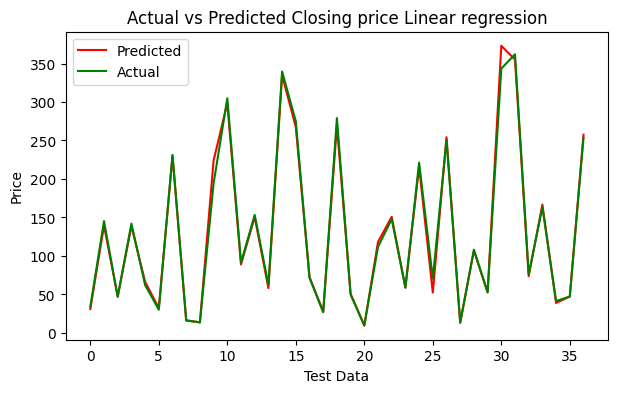

In [43]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(7,4))
plt.plot(10**y_pred_linear, color='red')
plt.plot(np.array(10**y_test),color='green')
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

Inferences: We can clearly see that there no big difference between actual test values with repect to predicted values. So there is relationship between the actual and predicted values.

Now we need to store our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.

In [44]:
linear_regessor_list = {'Mean Absolute Error' : MAE_linear,'Mean squared Error' : MSE_linear,
                   'Root Mean squared Error' : RMSE_linear,'R2 score' : R2_linear,'Adjusted R2 score' : Adjusted_R2_linear}

In [45]:
# Converting above dict into a dataframe
metric_df = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [46]:
  # Renaming the columns.
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean Absolute Error,4.8168
1,Mean squared Error,70.4204
2,Root Mean squared Error,8.3917
3,R2 score,0.9937
4,Adjusted R2 score,0.9930


In [47]:
# Let's represents the coefficient of determination or R-squared score to evalualte the metric score
R2_Score= r2_score(y_test, y_pred_linear)
R2_Score

0.9956268809883747

In [48]:
# Adjusted R2_Scores
n= y_test.shape[0] # no.of samples in test data
p= X_test.shape[1] # no. of input features

In [49]:
X_test.shape

(37, 3)

In [50]:
# Calculate Adjusted R² (Adjusted Coefficient of Determination)
adj_r2 = 1- (1-R2_Score) * (n-1)/(n-p-1)
adj_r2

0.9952293247145906

Note: Range of r2 score is between 0 to 1. If r2 score is near to 0, then we say it's bad model.If r2 score is near to 1, then we say it's good model. So we got the 99.56% best model. So there is no need to do Cross- Validation & Hyperparameter Tuning.

### **ML Model - 2: Build a Lasso Regression with cross validated regularization.**

In [51]:
# We have alreday imported the lasso library model

# Next,initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [52]:
# Printing the intercept and coefficients.
print("Lasso Interpect:",lasso.intercept_)
print("Lasso Coefficients:", lasso.coef_)

Lasso Interpect: 1.799864714136271
Lasso Coefficients: [-0.2079326   0.319775    0.30927158]


1. Cross- Validation & Hyperparameter Tuning using GridSearch

In [53]:
# Cross validation- optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters.
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [54]:
# Getting the best parameter
lasso_regressor.best_params_

{'alpha': 1e-05}

In [55]:
# Getting the best score
lasso_regressor.best_score_

-0.0011530156671872977

**Note:** after several iterations and trials, we get this value as best parameter value.

In [56]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(X_test)
print(y_pred_lasso)

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.8262
Mean squared Error : 70.3311
Root Mean squared Error : 8.3864
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [58]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
metric_df['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

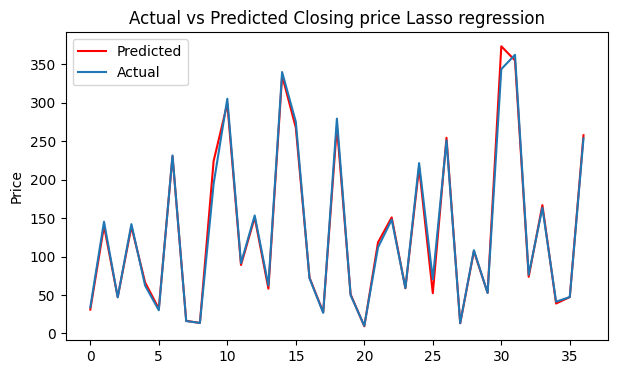

In [59]:
# Plotting the predicted values vs actual.
plt.figure(figsize=(7,4))
plt.plot(10**y_pred_lasso, color='red')
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

2. Cross- Validation & Hyperparameter Tuning

Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with GridSearch regularization is doing better compare to all others.

### **ML Model - 3: Buld a Ridge Regression with cross validated regularization**

In [60]:
# Initializing the model
ridge = Ridge()

# Initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# Cross validation.
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [61]:
# Finding the best parameter value for alpha
ridge_regressor.best_params_

{'alpha': 0.01}

In [62]:
# Getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.0013069214374932204

In [63]:
# Predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Checking the performance using evaluation metrics.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.8334
Mean squared Error : 70.2641
Root Mean squared Error : 8.3824
R2 score : 0.9938
Adjusted R2 score:  0.9932


#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MAE_ridge,MSE_ridge,RMSE_ridge,R2_ridge,Adjusted_R2_ridge]
metric_df['Ridge'] = ridge_regressor_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

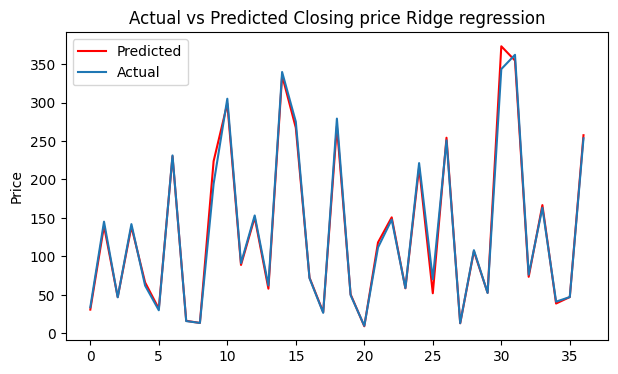

In [66]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(7,4))
plt.plot(10**y_pred_ridge, color='red')
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

Which hyperparameter optimization technique have you used and why?

GridSearchCV helps in finding the optimal combination of hyperparameters that produces the best performance for a given model and dataset.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with Ridge regularization is doing better compare to all others.

###**ML Model - 4: Build a Elastic-Net Regression with cross validation.**

In [68]:
# Importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# Cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [69]:
# Finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [70]:
# Finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.001152869583673031

In [71]:
# Making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(X_test)

In [72]:
# Checking the performance using evaluation metrics.
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.8483
Mean squared Error : 70.1569
Root Mean squared Error : 8.376
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [73]:
# Storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
metric_df['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

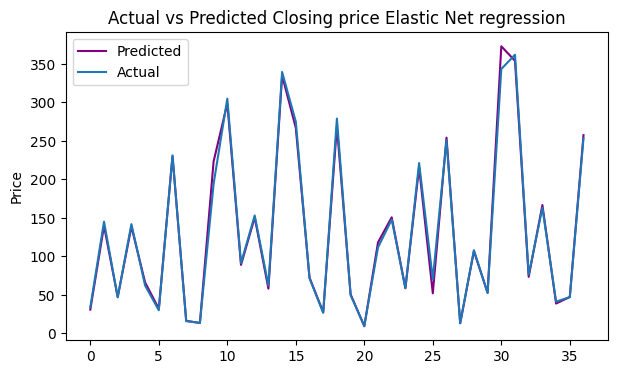

In [74]:
# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(7,4))
plt.plot(10**y_pred_elastic_net, color='purple')
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [75]:
# Comparing the performance of all models that we have implemented.
metric_df

,Metric,Linear Regression,Lasso,Ridge,Elastic Net
0,Mean Absolute Error,4.8168,4.8262,4.8334,4.8483
1,Mean squared Error,70.4204,70.3311,70.2641,70.1569
2,Root Mean squared Error,8.3917,8.3864,8.3824,8.3760
3,R2 score,0.9937,0.9938,0.9938,0.9938
4,Adjusted R2 score,0.9930,0.9932,0.9932,0.9932


**Inference:** From above data, we can clearly see that the best performing model is Elastic Net as it scores the best in every single metric.

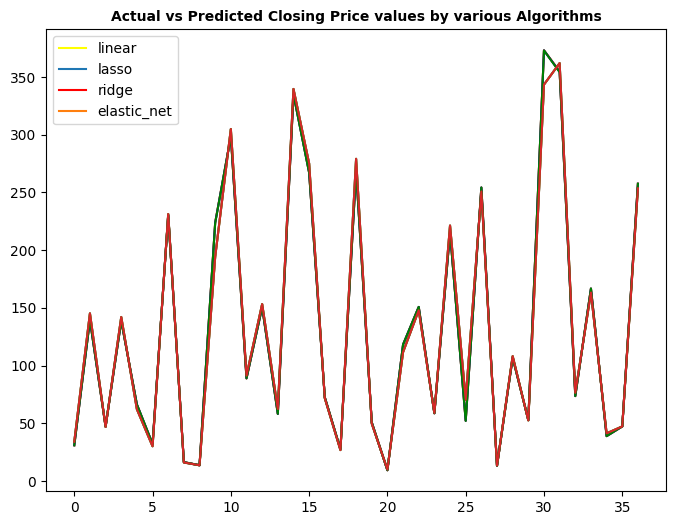

In [79]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(8,6))
plt.plot(10**y_pred_linear, color='yellow')
plt.plot(np.array(10**y_test ))
plt.plot(10**y_pred_lasso, color='red')
plt.plot(np.array(10**y_test))
plt.plot(10**y_pred_ridge, color='blue')
plt.plot(np.array(10**y_test))
plt.plot(10**y_pred_elastic_net, color='green')
plt.plot(np.array(10**y_test))
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=10)
plt.show()

**Inference:** As we can see from above graph, all of our models are performing really well and are able to closely approximate the actual values.


Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

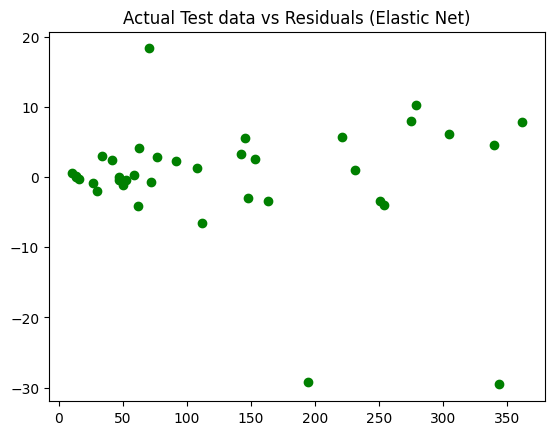

In [77]:
# Lets check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm.
# Homoscedasticity means that the model should perform well on all the datapoints.

# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net.reshape(37,)
plt.scatter(10**y_test,residuals,c='green')
plt.title('Actual Test data vs Residuals (Elastic Net)')

1. Which ML model did you choose from the above created models as your final prediction model and why?
In the above graph, we have plotted the residuals against test set value for our actual test set values for our best performing model (Elastic Net Regressor).

2. Explain the model which you have used and the feature importance using any model explainability tool?
As we can see, there is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So we can say that the assumption of Homoscedasticity is valid in this case.

# **Conclusion**

* Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.   
*   After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.
*   There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.
*   We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
*   There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
*   We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.
*   We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.
*   All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.

*   We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.
*   With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.

#**Thank You!**